<a href="https://colab.research.google.com/github/DARoSLab/MassRobotics/blob/main/MassRoboticsLecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Planar Manipulator**

# The One-link Arm


<img src="https://github.com/DARoSLab/MassRobotics/blob/main/Figures/single_link.png?raw=true" width="300">





In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
from math import pi

%matplotlib inline


# Task 1. Test the forward kinematics of the one linke planar manipulator.

Based on the convention described in the above figure, the following code returns the position of the point B given joint position $\theta_1$.


In [2]:
def forward_kinematics_one_link_robot(theta, l1 = 7):
  x = l1*np.cos(theta)
  y = l1*np.sin(theta)
  return np.array([x, y])

Let's test some angle

In [3]:
print(forward_kinematics_one_link_robot(np.deg2rad(20)))
print(forward_kinematics_one_link_robot(np.deg2rad(40)))
print(forward_kinematics_one_link_robot(np.deg2rad(60)))

[6.57784835 2.394141  ]
[5.3623111  4.49951327]
[3.5        6.06217783]


In [9]:
def plot_one_link_manipulator(q, l1):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)

  link1, = ax.plot([], [], 'b', lw=10)     # ax.plot returns a list of 2D line objects
  eff, = ax.plot([], [], 'g', marker='o', markersize=15)

  ax.set_xlim(( -0.5, 8.5))
  ax.set_ylim((-0.5, 8.5))
  ax.grid(True)
  txt_title = ax.set_title('')
  def drawFrame(k):
    k = 50*k
    theta1 = q[k]

    rA = [0, 0]
    rB = [l1*np.cos(theta1), l1*np.sin(theta1)]

    link1.set_data([rA[0], rB[0]], [rA[1], rB[1]])
    eff.set_data([rB[0], rB[0]],[rB[1], rB[1]])
    return link1, eff
  anim = animation.FuncAnimation(fig, drawFrame, frames=35, interval=100, blit=True)
  return anim

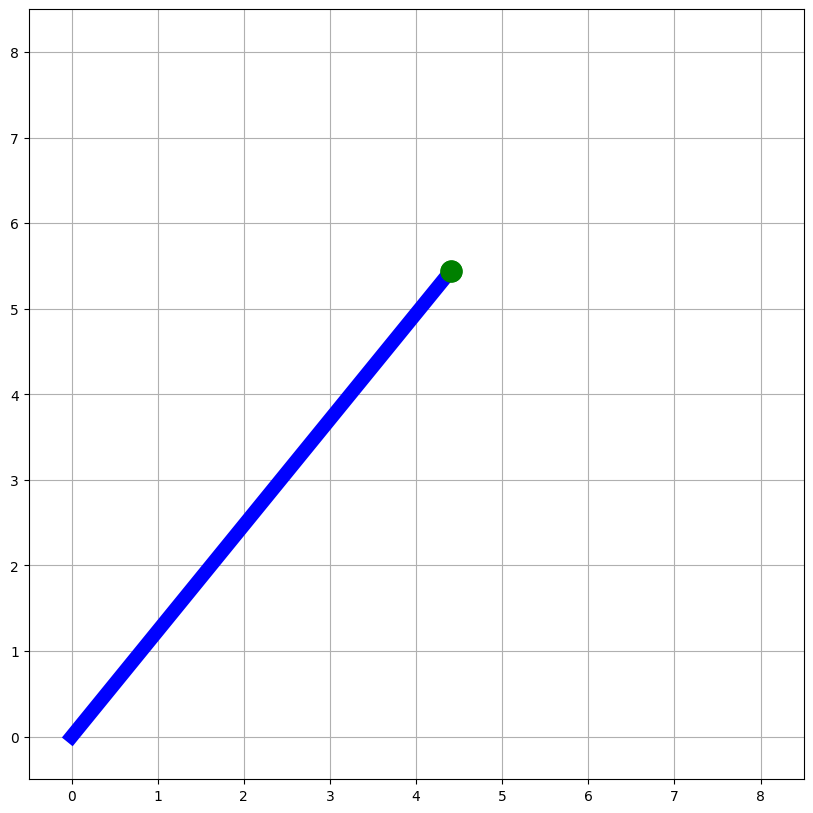

In [10]:
N = 2000
L1 = 7
q1 = np.linspace(0, np.deg2rad(60), N)
anim = plot_one_link_manipulator(q1, L1)
HTML(anim.to_html5_video())


# Task 2. Test the forward kinematics of the two DoF planar manipulator.

Based on the convention described in the above figure, complete the following code returning the position of the point C given joint position $q_0$ and $q_1$.


In [21]:
def forward_kinematics(q, l1=1, l2=1):
  q0, q1 = q
  x = l1*np.cos(q0) + l2*np.cos(q0+q1)
  y = l1*np.sin(q0) + l2*np.sin(q0+q1)
  return np.array([x,y])

In [22]:
print(forward_kinematics([np.deg2rad(20), np.deg2rad(40)]))

[1.43969262 1.20804555]


**You can use the provided function below to visualize the robot. It depends on your implementation of the forward kinematics function.**


In [23]:
def plot_planar_manipulator(q, l1, l2, eff_path=None):
  fig= plt.figure(figsize=(10,10))
  ax = plt.subplot(1,1,1)

  link1, = ax.plot([], [], 'b', lw=10)     # ax.plot returns a list of 2D line objects
  link2, = ax.plot([], [], 'r', lw=10)
  eff, = ax.plot([], [], 'g', marker='o', markersize=15)
  if eff_path is not None:
    ep, = ax.plot(eff_path[:, 0], eff_path[:, 1], 'g-')
  ax.set_xlim(( -2.5, 2.5))
  ax.set_ylim((-2.5, 2.5))
  txt_title = ax.set_title('')
  def drawFrame(k):
    k = 100*k
    q0, q1 = q[k]

    rA = [0, 0]
    rB = [l1*np.cos(q0), l2*np.sin(q0)]
    rC = forward_kinematics(q[k, :], l1, l2)

    link1.set_data([rA[0], rB[0]], [rA[1], rB[1]])
    link2.set_data([rB[0], rC[0]], [rB[1], rC[1]])
    eff.set_data([rC[0], rC[0]],[rC[1], rC[1]])
    return link1, link2, eff
  anim = animation.FuncAnimation(fig, drawFrame, frames=35, interval=70, blit=True)
  return anim



In [24]:
def test_forward_kinematics():
  """
  Test function for Forward kinematics
  """
  test_configurations = np.zeros((4, 2))
  test_configurations[:, 0] = np.linspace(0, np.pi, 4)
  test_configurations[:, 1] = np.linspace(0, np.pi, 4)
  test_res = np.zeros((4, 2))
  sol = np.array([[ 2.00000000e+00, 0.00000000e+00],
                  [ 3.33066907e-16,  1.73205081e+00],
                  [-1.00000000e+00,  3.33066907e-16],
                  [ 0.00000000e+00, -1.22464680e-16]])
  for i in range(4):
    test_res[i, :] = forward_kinematics(test_configurations[i])
  if np.allclose(test_res, sol):
    print('Your FK implementation is correct!!')
  else:
    print('FK implemenation is wrong!')

In [25]:
test_forward_kinematics()

Your FK implementation is correct!!


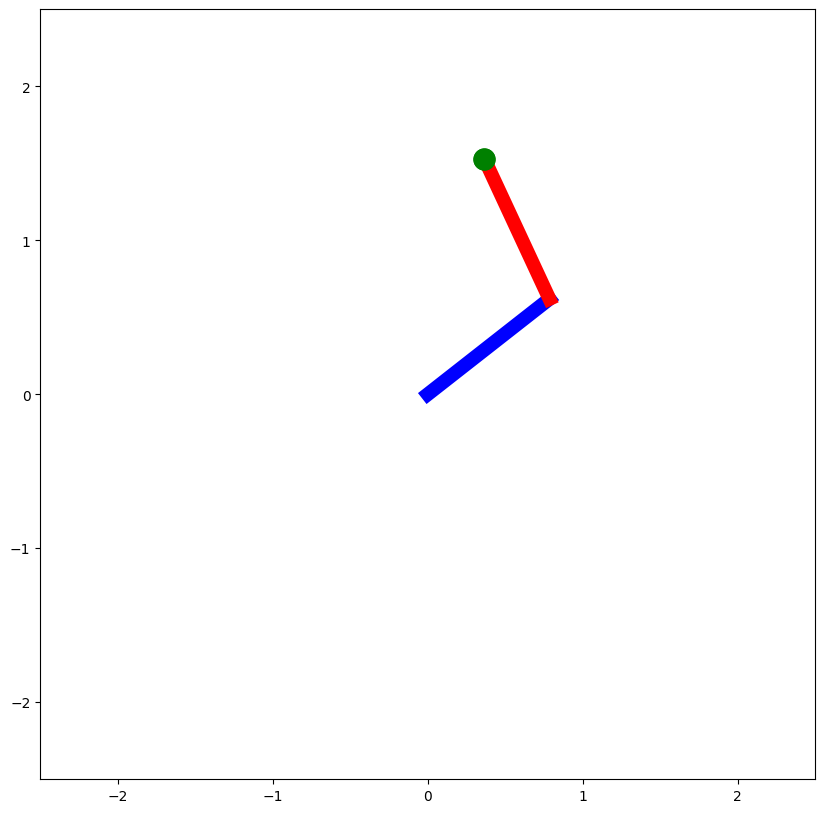

In [26]:
N = 4000
L1 = 1
L2 = 1
q1 = np.linspace(0, np.pi/4, N)
q2 = np.linspace(0, np.pi/2, N)
q = np.zeros((N, 2))
q[:, 0] = q1
q[:, 1] = q2
anim = plot_planar_manipulator(q, L1, L2)
HTML(anim.to_html5_video())

# Task 3. derive the Inverse kinematics of the two DoF manipulator.

Complete the following inverse kinematics function returning joint position $\theta_1$ and $\theta_2$ given the position of point C.

In [ ]:
def inverse_kinematics(x, y, l1, l2):
  q1 = np.arccos((x*x + y*y - l1*l1 - l2*l2)/(2*l1*l2)) #fill in your code here
  q0 = np.arctan(y/x) - np.arctan((l2*np.sin(q1))/(l1 + l2*np.cos(q1))) #fill in your code here
  return np.array([q0, q1])

In [ ]:
def test_inverse_kinematics(l1, l2):
  """
  Test function for Inverse Kinematics
  """
  x = 0.7 + np.linspace(0, 0.1, 4)
  y = 0.7 + np.linspace(0, 0.1, 4)
  sol = np.array([[-0.2675924,   2.10598112],
                  [-0.24024978,  2.05129588],
                  [-0.21244591,  1.99568815],
                  [-0.18413395, 1.93906422]])
  test_res = inverse_kinematics(x, y, l1, l2).T
  if np.allclose(test_res, sol):
    print('Your IK implementation is correct!!')
  else:
    print('Yours: ', test_res)
    print('Soln: ', sol)
    print('IK implemenation is wrong!')

**You can check the correctness of your code by calling the provided test function**

In [ ]:
test_inverse_kinematics(L1, L2)

Your IK implementation is correct!!


**Plot q1 and q2**

In [ ]:
r = 0.4
theta = np.linspace(0, 2*np.pi, N)
x = 0.7 + r*np.cos(theta)
y = 0.7 + r*np.sin(theta)
q_ik = inverse_kinematics(x, y, 1, 1).T

**Animate the manipulator**

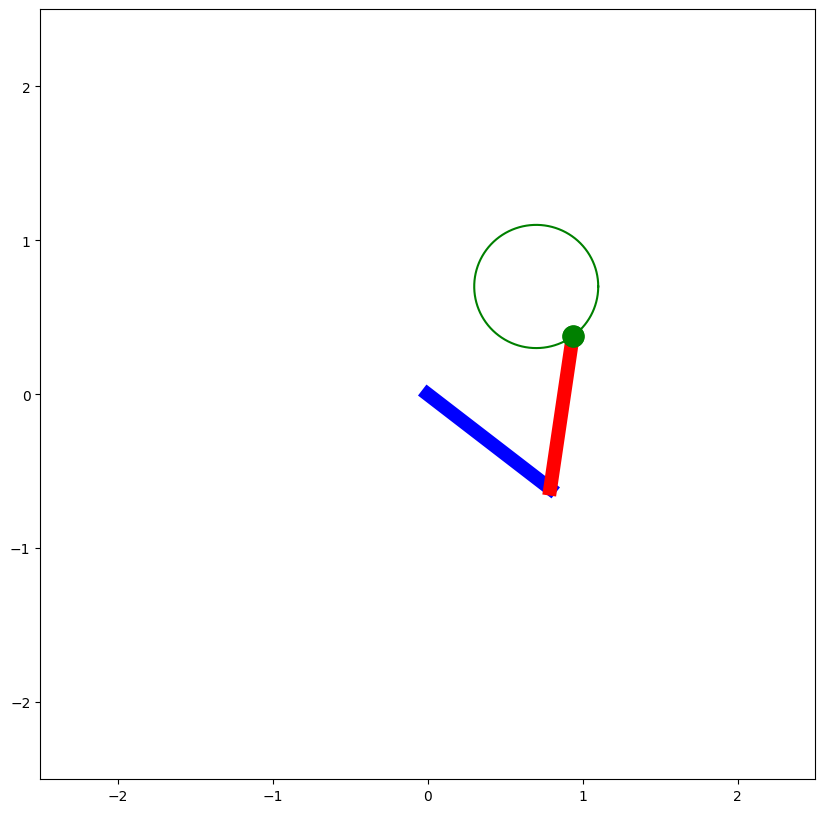

In [ ]:
anim = plot_planar_manipulator(q_ik, L1, L2, eff_path=np.array([x,y]).T)
HTML(anim.to_html5_video())